In [43]:
from datasets import load_dataset

dataset_train = load_dataset('eduvedras/QA',split='train',trust_remote_code=True)
dataset_test = load_dataset('eduvedras/QA',split='test',trust_remote_code=True)

In [44]:
#True vs False
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import gca

from matplotlib.pyplot import figure, savefig, show, subplots
from seaborn import heatmap
from numpy import array, ndarray
from matplotlib.figure import Figure

import numpy as np
types = ['decision_tree','overfitting','pca','correlation_heatmap','boxplots','histograms_symbolic','class_histogram','nr_records_nr_variables','histograms_numeric']

results2 = {'NumberofRecords':[0,0,0,0,0,0,0,0,0]}
t = 0
f = 0
for i in range(len(dataset_train)):
    for j in range(len(types)):
        if types[j] == 'decision_tree' and 'overfitting' in dataset_train[i]['Chart_name']:
            continue
        if types[j] in dataset_train[i]['Chart_name']:
            results2['NumberofRecords'][j] += 1
            break
    if dataset_train[i]['Answer'] == 'T':
        t += 1
    elif dataset_train[i]['Answer'] == 'F':
        f += 1

for i in range(len(dataset_test)):
    for j in range(len(types)):
        if types[j] == 'decision_tree' and 'overfitting' in dataset_test[i]['Chart_name']:
            continue
        if types[j] in dataset_test[i]['Chart_name']:
            results2['NumberofRecords'][j] += 1
            break
    if dataset_test[i]['Answer'] == 'T':
        t += 1
    elif dataset_test[i]['Answer'] == 'F':
        f += 1
        
results = {'NumberofRecords':[t,f]}

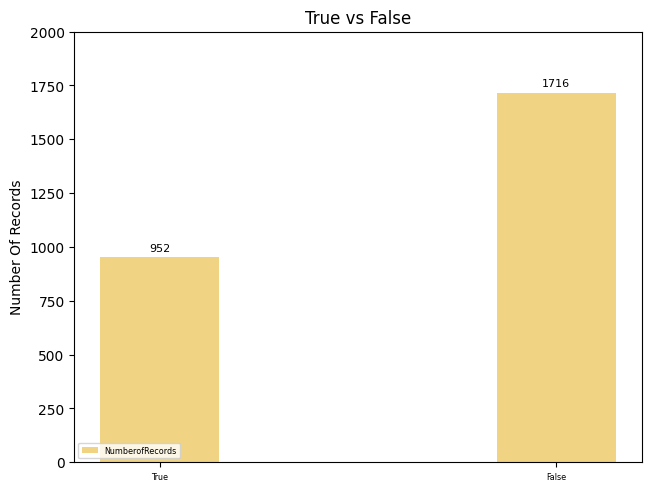

In [46]:
x = np.arange(2)  # the label locations
width = 0.3  # the width of the bars
multiplier = 1

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width,label=attribute, color = '#f0d484')
    ax.bar_label(rects, padding=3,fontsize=8)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Records')
ax.set_title('True vs False')
ax.set_xticks(x + width, ['True','False'])
ax.legend(loc='lower left', ncols=1,fontsize='xx-small')
ax.set_ylim(0, 2000)
ax.tick_params(axis="x", labelrotation=0, labelsize="xx-small")


savefig(f"truevsfalse.png", bbox_inches='tight')
show()

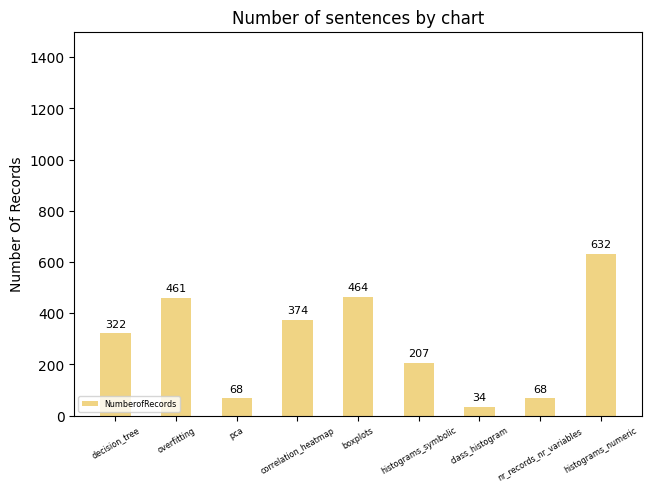

In [47]:
x = np.arange(len(types))  # the label locations
width = 0.5  # the width of the bars
multiplier = 1

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width,label=attribute, color = '#f0d484')
    ax.bar_label(rects, padding=3,fontsize=8)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Records')
ax.set_title('Number of sentences by chart')
ax.set_xticks(x + width, types)
ax.legend(loc='lower left', ncols=1,fontsize='xx-small')
ax.set_ylim(0, 800)
ax.tick_params(axis="x", labelrotation=30, labelsize="xx-small")


savefig(f"datasetstats.png", bbox_inches='tight')
show()

In [37]:
sum = 0

for i in results2['NumberofRecords']:
    sum += i
    
sum

4626

In [25]:
print(len(types))
print(len(results2['NumberofRecords']))

9
9
